# Effects of Titanic's Passengers Characteristics on Their Chance to Survive
## by Yahya Al-Balky

## Investigation Overview

In this investigation, I wanted to look at the characteristics of Titanic's passengers that could be used to predict their chance to survive. The main focus was on the passenger's sex, economic class, and fare.

## Dataset Overview

The data consisted of attributes of exactly 891 Titanic's passengers. The attributes included their id, name, economic class, sex, age, # of siblings/spouses aboard the Titanic, # of parents/children aboard the Titanic, fare, ticket number, cabin number, port of embarkation, and wether they survived or not. Three data points were removed from the analysis due to them being outliers. The id, name, and ticket number features was removed due to irrelevancy to our analysis, and the cabin number was removed due to a lot of missing information.

In [1]:
# import all packages and set plots to be embedded inlines
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
titanic = pd.read_csv('titanic.csv')

#### Data Cleaning:

In [3]:
# drop columns irrelevant to the analysis ('PassengerId', 'Name', and 'Ticket')
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [4]:
# drop 'Cabin' column due to it having too many null values (around 77%)
titanic.drop(['Cabin'], axis=1, inplace=True)

In [5]:
# fill missing values in 'Age' and 'Embarked' with median and most-common value
titanic.Age.fillna(titanic.Age.median(), inplace=True)
titanic.Embarked.fillna(titanic.Embarked.value_counts().index[0], inplace=True)

In [6]:
# removing outliers
titanic = titanic[titanic.Fare < 500]

## Number of Passengers Survived vs Didn't Survive

The titanic dataset is un-balanced (only ~38% survived).

Values' Percentages:
0    0.618243
1    0.381757
Name: Survived, dtype: float64


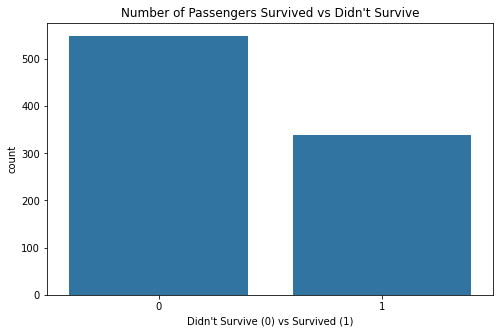

In [7]:
default_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])

def barplot(feature, hue=None):
    ''' function for plotting categorical variables and printing their values' percenteges '''
    sb.countplot(data=titanic, x=feature, color=default_color, hue=hue)
    plt.xlabel(feature)
    print("Values' Percentages:")
    if hue == None:
        print(titanic[feature].value_counts(normalize=True))
    else:
        print(titanic[[feature, hue]].value_counts(normalize=True, sort=False))

barplot('Survived')
plt.title("Number of Passengers Survived vs Didn't Survive")
plt.xlabel("Didn't Survive (0) vs Survived (1)");

## Distribution of Passenger Fare

Passengers' fares in the dataset take on a big range of values, from 0 at the lowest, to about 270 at the highest. Plotted on a logarithmic scale, the distribution of passengers' fares takes on a multimodal shape.

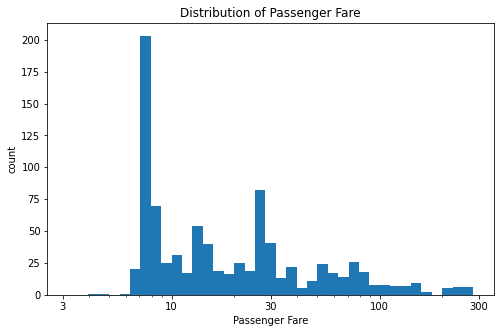

In [8]:
log_binsize = 0.05
bins = 10 ** np.arange(0.5, np.log10(titanic['Fare'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=titanic, x='Fare', bins=bins)
plt.xscale('log')
plt.xticks([3, 10, 30, 100, 300], ['3', '10', '30', '100', '300'])
plt.title('Distribution of Passenger Fare')
plt.xlabel('Passenger Fare')
plt.ylabel('count');

## Pairwise Correlations Among Features

'Fare' and 'Pclass' are highly negatively correlated with each other, as there is an obvious relation between being from a higher class and paying more for better service. Both of these variables are also correlated with the passenger's chance of survival.

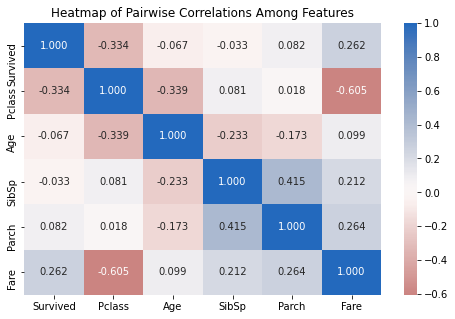

In [9]:
plt.figure(figsize=[8, 5])
sb.heatmap(titanic.corr(), annot=True, fmt='.3f',
           cmap='vlag_r', center=0)
plt.title('Heatmap of Pairwise Correlations Among Features');

## Survival Rate by Sex

The survival rate among females is way higher than among males (only about 25% of the males survived, while about 65% of the females survived!).

Values' Percentages:
Sex     Survived
female  0           0.091216
        1           0.261261
male    0           0.527027
        1           0.120495
dtype: float64


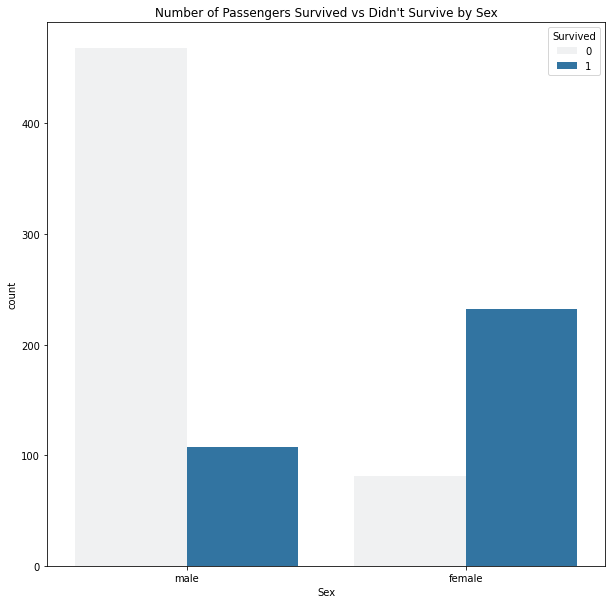

In [10]:
plt.figure(figsize=[10, 10])
barplot('Sex', hue='Survived')
plt.title("Number of Passengers Survived vs Didn't Survive by Sex");

## The Effect of The Economic Class on The Relationship Between Survival Rate and Sex

Interestingly, our assumption of higher survival rates among females in comparison to males only applies for passengers from the lower class, while the survival rate among males was actually higher than females for passengers from both the upper and middle classes!

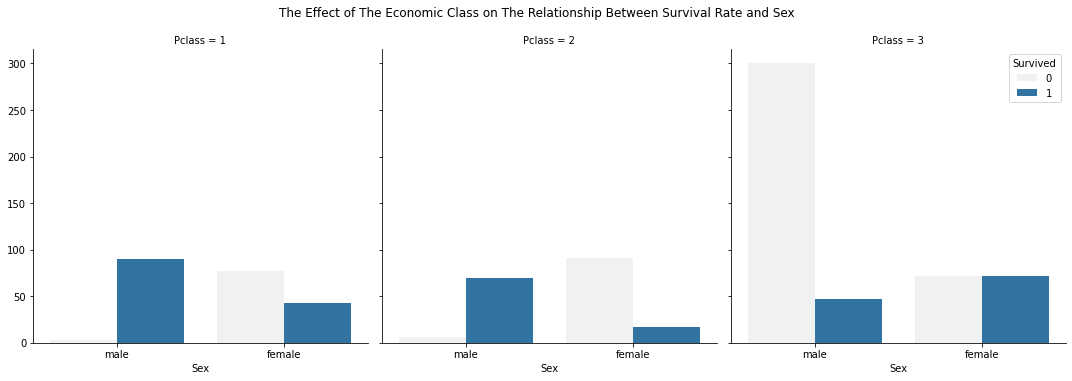

In [11]:
def facet_clusteredbarchart(feature):
    ''' function for plotting categorical features against the relationship between the survival rate and sex '''
    g = sb.FacetGrid(data=titanic, col=feature, size=5)
    g.map(sb.countplot, 'Sex', hue=titanic.Survived)
    plt.legend(title='Survived');

facet_clusteredbarchart('Pclass')
plt.suptitle('The Effect of The Economic Class on The Relationship Between Survival Rate and Sex', y=1.05);

## The Effect of The Port of Embarkation on The Relationship Between Survival Rate and Sex

Seems like the high female survival rate in comparison to males is only present in passengers that embarked from Southampton and Queentown, while it is actually the opposite for passengers that embarked from Cherbourg (higher survival rate among males).

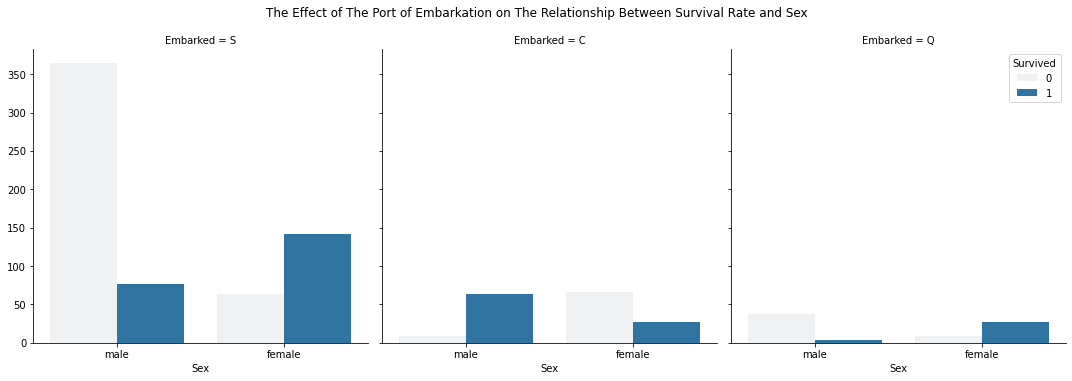

In [12]:
facet_clusteredbarchart('Embarked')
plt.suptitle('The Effect of The Port of Embarkation on The Relationship Between Survival Rate and Sex', y=1.05);